# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier   

# other libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN    
from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score  
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, precision_recall_curve, roc_curve, average_precision_score, classification_report   


# 1. The imformation from data

In [3]:
df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.1 To see if there exists missing value

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 1.2 Describe the data

In [5]:
print("Fraudulent")
print(df.Amount[df.Class == 1].describe())
print()
print("Non-Fradulent")
print(df.Amount[df.Class == 0].describe())

Fraudulent
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fradulent
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## 1.3 See the possible relationship between the default amount /time and the class label

### 1.3.1 The relationship with default time

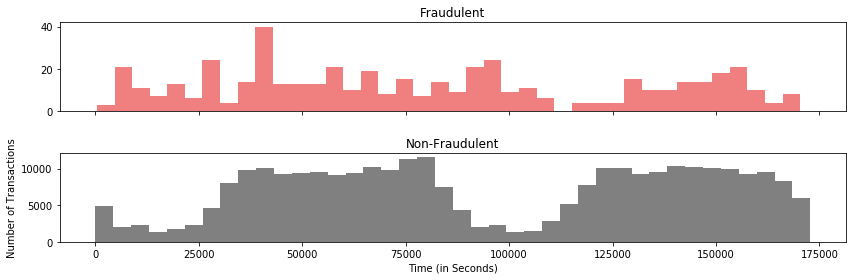

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex= True, figsize = [12,4])

ax1.hist(df.Time[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Time[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


### 1.3.2 The relationship with default amount

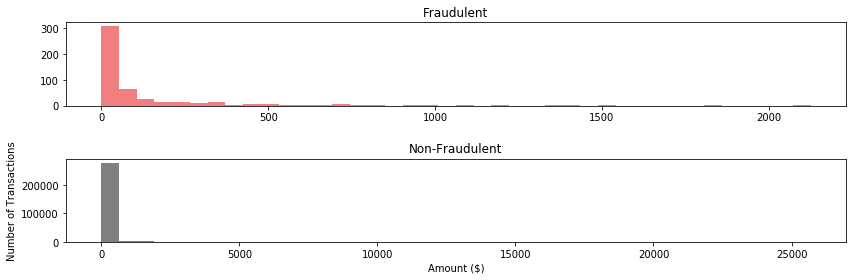

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = [12,4])

ax1.hist(df.Amount[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Amount[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


#### Remark: From this figure, we can find that fraudulent happened with small amount of transactions frequently. The smaller the amount is, the higher frequency of fraudulent. 

### 1.3.3 Scaling the data

#### To eliminate the infulence of different variables' scale, we will standardize the data now.

In [8]:
# Variable 'Amount' transform into 'normAmount'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

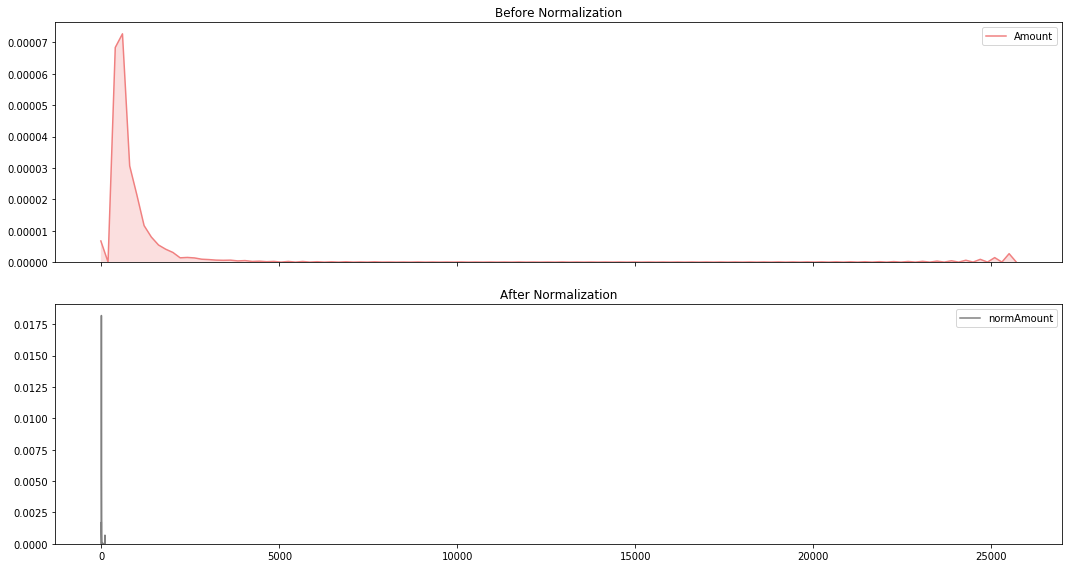

In [9]:
f, (ax1, ax2) = plt.subplots(2,1,sharex= True,figsize =( 15, 8))

sns.kdeplot(df['Amount'],shade=True, ax = ax1, color='lightcoral')
ax1.set_title('Before Normalization')

sns.kdeplot(df['normAmount'],shade=True, ax = ax2, color='gray')
ax2.set_title('After Normalization')

plt.tight_layout(h_pad=2)
plt.show()

### 1.3.4 Drop useless variables: 'Time' and 'Amount'


In [10]:
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 1.4 Look into the distribution of two classes

Text(0,0.5,'Frequency')

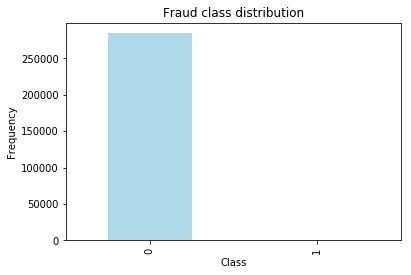

In [11]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color='lightblue')
plt.title("Fraud class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### The above figure shows that the orignial data is highly imbalanced. So we need to do some resampleing method to handle this problem.

# 2. Data processing
#### We will try SMOTE algorithm to do oversampling.

## 2.1 Split the data
#### 2.1.1 We use 30% of the data do the testing.

#### Do the spliting because we want to test the models on the original data set. So we split them first and do over-sampling on the train data set.

In [12]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "Class"]
    x_labels=x.loc[:,x.columns=="Class"]           
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)
print(pd.value_counts(data_test_y['Class']))

length of training data
199364
length of test data
85443
0    85291
1      152
Name: Class, dtype: int64


#### 2.1.2 Use the SMOTE (oversampling)

In [13]:
sm = SMOTE(random_state=0) 
sm_data_X,sm_data_y=sm.fit_sample(data_train_X.values,data_train_y.values.ravel())

#### 2.1.3 Check the data after sampling

In [14]:
columns = data_train_X.columns
sm_data_X = pd.DataFrame(data=sm_data_X,columns=columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=["Class"])
print(len(sm_data_X))

398048


In [15]:
print("Length of oversampled data is:",len(sm_data_X))
print("Number of normal transcation:",len(sm_data_y[sm_data_y["Class"]==0]))
print("Number of fraud transcation:",len(sm_data_y[sm_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is:",len(sm_data_y[sm_data_y["Class"]==0])/len(sm_data_X))
print("Proportion of fraud data in oversampled data is:",len(sm_data_y[sm_data_y["Class"]==1])/len(sm_data_X))

Length of oversampled data is: 398048
Number of normal transcation: 199024
Number of fraud transcation: 199024
Proportion of Normal data in oversampled data is: 0.5
Proportion of fraud data in oversampled data is: 0.5


#### The above shows that the data is balaced after resampling.

## 2.2 Load the processed trainning data and original test data into csv file

In [16]:
newtraindata=pd.concat([sm_data_X,sm_data_y],axis=1)
newtestdata=pd.concat([data_test_X,data_test_y],axis=1)
newtraindata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_train.csv',sep=',')
newtestdata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_test.csv',sep=',')

In [17]:
new_train_df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_train.csv")

#### Visulization of processed data

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


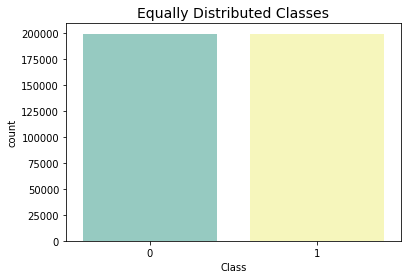

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_train_df['Class'].value_counts()/len(new_train_df))

sns.countplot('Class', data=new_train_df,palette="Set3")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# 3. Parameter choosing

In [23]:
new_X = new_train_df.drop('Class', axis=1)
new_y = new_train_df['Class']

In [25]:
X_train = new_X.values
X_test = data_test_X.values
y_train = new_y.values.ravel()
y_test = data_test_y.values

## 3.1 Logistic Regression

In [26]:
log_regl = LogisticRegression()

### 3.1.1 Use grid search to find the best (hyper)parameter

In [27]:
log_reg1_param = {'penalty' : ['l1','l2'], 'C' : [0.01, 0.1, 1, 10, 100]}

gridCV_log_regl = GridSearchCV(log_regl, log_reg1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_log_regl.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.1.2 Logistic regreesion best estimator:

In [28]:
log_reg1_best_parameters = gridCV_log_regl.best_params_
print('The best parameters for using Logistic Regression is', log_reg1_best_parameters)

The best parameters for using Logistic Regression is {'C': 0.01, 'penalty': 'l2'}


## 3.2 KNN

In [ ]:
knears1 = KNeighborsClassifier()

### 3.2.1 Use grid search to find the best (hyper)parameter

In [ ]:
knears1_param = {'n_neighbors': list(range(1, 31)), 'algorithm': ['auto','ball_tree','kd_tree','brute']}

gridCV_knearsl = GridSearchCV(knears1, knears1_param , scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_knearsl.fit(X_train, y_train)

### 3.2.2 KNN best estimator:

In [ ]:
knears1_best_parameters = gridCV_knearsl.best_params_
print('The best parameters for using KNN is', knears1_best_parameters)

## 3.3 Support Vector Machine

In [36]:
svc1 = SVC()

### 3.3.1 Use grid search to find the best (hyper)parameter

In [ ]:
svc1_param = {'C': [0.3, 0.5, 0.7, 0.9, 1, 3], 'kernel':['rbf', 'poly', 'sig,oid', 'linear']}

gridCV_svcl = GridSearchCV(svc1, svc1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_svcl.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


### 3.3.2 SVC best estimator:

In [ ]:
svc1_best_parameters = gridCV_svcl.best_params_
print('The best parameters for using Surpport Vector Classifier is', svc1_best_parameters)

## 3.4 Decision tree

In [ ]:
tree1 = DecisionTreeClassifier()

### 3.4.1 Use grid search to find the best (hyper)parameter

In [ ]:
tree1_param = {'criterion':['gini', 'entropy'], 'max_depth': list(range(2,7)), 'min_samples_leaf': list(range(5, 10))}

gridCV_tree1 = GridSearchCV(tree1, tree1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_treel.fit(X_train, y_train)

### 3.4.2 Decision tree best estimator:

In [ ]:
tree1_best_parameters = gridCV_treel.best_params_
print('The best parameters for using Decision tree Classifier is', tree1_best_parameters)

In [ ]:
# Stratified k-folds
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_validation, y_validation = X[test_index], y[test_index]

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}